#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Student 1 Name: Ans Imran
- Student 2 Name: Richard Awde

Import modules and anything else you need

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})


## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by:
$$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`)
$$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [2]:
def f(x):
    y = (x**2) * (np.exp( -x**2 ))
    return y


def abs_error(numerical_value, actual_value):
    y = abs(actual_value) - abs(numerical_value)
    return abs(y)


Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

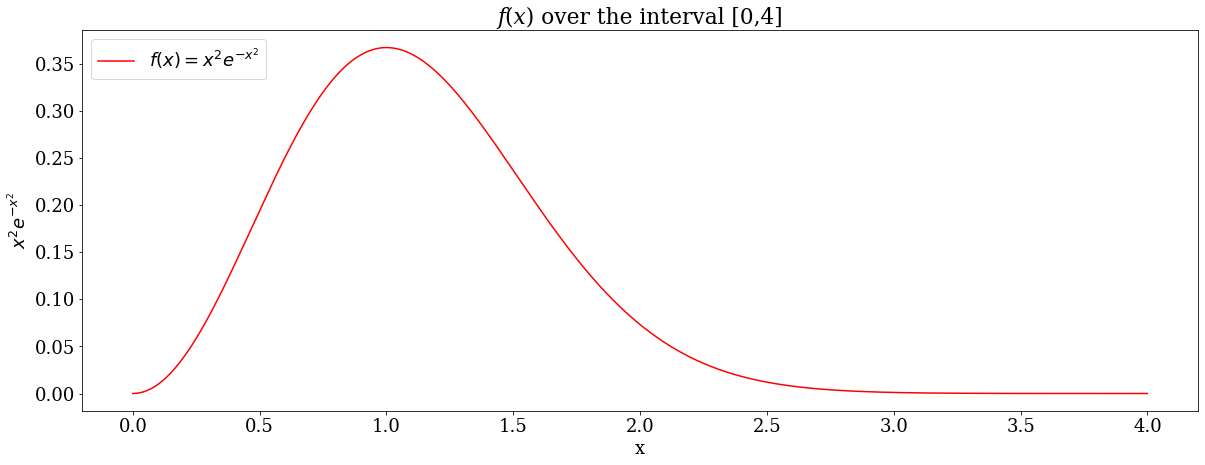

In [5]:
x = np.linspace(0,4,10000)


plt.figure(figsize=(20,7))

plt.plot(x, (x**2) * (np.exp( -x**2 )) , 'r',label=r"$ f(x)=x^{2} e^{-x^2} $")

plt.legend(loc = 2)
plt.xlabel('x')
plt.ylabel("$ x^{2} e^{-x^2} $")
plt.title("𝑓(𝑥) over the interval [0,4]")
plt.show()


Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [8]:
# Defining functions related to domain & Generating the domain
n1 = 11                         # n points create n-1  intervals, so, 11 points will generate 10 intervals               
n2 = 31

x1 = np.arange(0,1.01,0.01)        # this line will create 101 equidistant points, the list of points will also contain (continued)
x2 = np.arange(0,3.03,0.03)        # '0 & 1' as points!


def step_size_f(x):
    h  = x[1] - x[0]
    return h

# def mid_points(x):
#     """ This function takes in an array and returns  another array that contains averages of successive pairs of points
#     of the original/input list"""
    
#     ma = np.array([])           # mid point array
#     for i in range(len(x) - 1):
#         y = (x[i] + x[i+1])/2
#         ma = np.append(ma,y)
#     return ma


xm1 = np.arange(0.005,0.995, 0.01)
xm2 = np.arange(0.015,2.985, 0.03)


# Defining right, left, mid point, trapezoidal and composite simpson rules

# def left_rule(x,step_size):
#     y          = step_size * f(x[0:-1])   # we use all the domain points, except the LAST one
#     total_area = np.sum(y)                  
#     return total_area                             

def general_rule(step_size,function_list):
    y          = step_size * np.sum( function_list )                      
    return y                        

def left_rule(step_size,function_list):
    y = general_rule(step_size, function_list[0:-1] )  # we use all the domain points, except the LAST one
    return y

# def right_rule(x,step_size):
#     y          = step_size * f(x[1:])     # we use all the domain points, except the FIRST one
#     total_area = np.sum(y) 
#     return total_area

def right_rule(step_size,function_list):
    y = general_rule(step_size, function_list[1:] )  # we use all the domain points, except the LAST one
    return y

def mid_rule(step_size,function_list):
    y = general_rule(step_size, function_list)
    return y

def trap_rule(step_size, function_list):
    y = step_size * ( ( (function_list[0] + function_list[-1])/2 ) + np.sum(function_list[1:-1]) )# x[1:-1] will skip the first and last entries of array 'x' 
    return y


def trap_rule_2(step_size, function_list):
    y = ( right_rule(step_size, function_list) + left_rule(step_size, function_list) )/2      # trap rule as an average of left and right rules
    return y


def composite_simpson_rule(step_size, function_list):
    y = step_size * ( function_list[0] + function_list[-1] + 2 * np.sum(function_list[2:-2:2]) + 4 * np.sum(function_list[1:-1:2]) )/3
    return y
# since there are now n/2 steps, so, we multiplied the 'h'(step size for right, left rules etc) by 2
# x[x[2:-2:2]] skips the first two and last two points and returns the remaining even points
# x[x[2:-2:2]] skips the first and last points and returns the remaining odd points


def composite_simpson_rule_2(step_size, function_list):   # composite rule as a weighted average of trapezoidal and midpoint rules
    y = (2 * mid_rule( step_size, function_list )   +   trap_rule(step_size, function_list)  ) / 3
    return y

difference = composite_simpson_rule_2( step_size_f(x1) ,f(x1)) - composite_simpson_rule( step_size_f(x1) ,f(x1))
print('Difference', difference)

def test_function(x):
    y = x**2
    return y




print(f"\nThe test function is: x^2")

print(f"\nThe analytically calculated value of the integral of test function in the domain [0,3] is:       { 9 }\n")

print(f"\nThe value of the integral of test function in the domain [0,3] using LEFT  rule is:              { left_rule( step_size_f(x2) ,test_function(x2)) }\n")

print(f"\nThe value of the integral of test function in the domain [0,3] using RIGHT rule is:              { right_rule( step_size_f(x2) ,test_function(x2)) }\n")

print(f"\nThe value of the integral of test function in the domain [0,3] using MIDPOINT rule is:           { mid_rule( step_size_f(x2) ,test_function( mid_points(x2) )) }\n")

print(f"\nThe value of the integral of test function in the domain [0,3] using COMPOSITE SIMPSON rule is:  { composite_simpson_rule( step_size_f(x2) ,test_function(x2)) }\n")

print(f"\nThe value of the integral of test function in the domain [0,3] using TRAPEZOIDAL rule is:        { trap_rule( step_size_f(x2) ,test_function(x2)) }\n")


Difference 0.0012262647016874906

The test function is: x^2

The analytically calculated value of the integral of test function in the domain [0,3] is:       9


The value of the integral of test function in the domain [0,3] using LEFT  rule is:              8.86545


The value of the integral of test function in the domain [0,3] using RIGHT rule is:              9.135449999999999


The value of the integral of test function in the domain [0,3] using MIDPOINT rule is:           8.999775000000001


The value of the integral of test function in the domain [0,3] using COMPOSITE SIMPSON rule is:  8.999999999999998


The value of the integral of test function in the domain [0,3] using TRAPEZOIDAL rule is:        9.000449999999999



For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [10]:
print(f"The Numerical values of the integral for the domain [0,1](as calculated using MATHEMATICA) is:    0.1894723458204922\n")

print(f"\nThe value of the integral in the domain [0,1] using LEFT  rule is:              { left_rule( step_size_f(x1) ,f(x1)) }")
print(f"The absolute error is: {abs_error( left_rule(step_size_f(x1),f(x1)) ,0.1894723458204922)}\n")

print(f"\nThe value of the integral in the domain [0,1] using RIGHT rule is:              { right_rule( step_size_f(x1) ,f(x1)) }")
print(f"The absolute error is: {abs_error( right_rule(step_size_f(x1),f(x1)) ,0.1894723458204922)}\n")

print(f"\nThe value of the integral in the domain [0,1] using MIDPOINT rule is:           { mid_rule( step_size_f(x1) ,f( mid_points(x1) )) }")
print(f"The absolute error is: {abs_error( mid_rule(step_size_f(x1),f(xm1)) ,0.1894723458204922)}\n")

print(f"\nThe value of the integral in the domain [0,1] using COMPOSITE SIMPSON rule is:  { composite_simpson_rule( step_size_f(x1) ,f(x1)) }")
print(f"The absolute error is: {abs_error( composite_simpson_rule(step_size_f(x1),f(x1)) ,0.1894723458204922)}\n")

print(f"\nThe value of the integral in the domain [0,1] using TRAPEZOIDAL rule is:        { trap_rule( step_size_f(x1) ,f(x1)) }")
print(f"The absolute error is: {abs_error( trap_rule(step_size_f(x1),f(x1)) ,0.1894723458204922)}\n")


print('\n\n\n')


print(f"The Numerical values of the integral for the domain [0,3](as calculated using MATHEMATICA) is:    0.4429185594236305\n")

print(f"\nThe value of the integral in the domain [0,3] using LEFT  rule is:              { left_rule( step_size_f(x2) ,f(x2)) }")
print(f"The absolute error is: {abs_error( left_rule(step_size_f(x2),f(x2)) ,0.4429185594236305)}\n")

print(f"\nThe value of the integral in the domain [0,3] using RIGHT rule is:              { right_rule( step_size_f(x2) ,f(x2)) }")
print(f"The absolute error is: {abs_error( right_rule(step_size_f(x2),f(x2)) ,0.4429185594236305)}\n")

print(f"\nThe value of the integral in the domain [0,3] using MIDPOINT rule is:           { mid_rule( step_size_f(x2) ,f( mid_points(x2) )) }")
print(f"The absolute error is: {abs_error( mid_rule(step_size_f(x2),f(xm2)) ,0.4429185594236305)}\n")

print(f"\nThe value of the integral in the domain [0,3] using COMPOSITE SIMPSON rule is:  { composite_simpson_rule( step_size_f(x2) ,f(x2)) }")
print(f"The absolute error is: {abs_error( composite_simpson_rule(step_size_f(x2),f(x2)) ,0.4429185594236305)}\n")

print(f"\nThe value of the integral in the domain [0,3] using TRAPEZOIDAL rule is:        { trap_rule( step_size_f(x2) ,f(x2)) }")
print(f"The absolute error is: {abs_error( trap_rule(step_size_f(x2),f(x2)) ,0.4429185594236305)}\n")


The Numerical values of the integral for the domain [0,1](as calculated using MATHEMATICA) is:    0.1894723458204922


The value of the integral in the domain [0,1] using LEFT  rule is:              0.18763294859419608
The absolute error is: 0.0018393972262961134


The value of the integral in the domain [0,1] using RIGHT rule is:              0.1913117430059105
The absolute error is: 0.0018393971854183122


The value of the integral in the domain [0,1] using MIDPOINT rule is:           0.1894723458383767
The absolute error is: 0.003678610151002709


The value of the integral in the domain [0,1] using COMPOSITE SIMPSON rule is:  0.1894723459022706
The absolute error is: 8.177841737122549e-11


The value of the integral in the domain [0,1] using TRAPEZOIDAL rule is:        0.18947234580005326
The absolute error is: 2.0438928327592976e-11





The Numerical values of the integral for the domain [0,3](as calculated using MATHEMATICA) is:    0.4429185594236305


The value of the integral i

We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

In [ ]:
# The following cell will take some time to run


In [11]:
n_vs_error = np.zeros((1000,6))  # we will calculate the absolute error for the values of intervals that are multiples
                                # of 10 i.e     20, 40 ,60, ..... , 10000

for i in range(1001):            # we'll get 400 data points in total
    
    if i == 0:
        continue
    
    points = i*10 + 1
    
    n = np.linspace(0,3,points)  # no. of points
    
    n_vs_error[i-1][0] = points - 1  # first column of this matrix wil contain no. of the intervals
    
    
    
    n_vs_error[i-1][1] = abs_error( left_rule( step_size_f(n) ,f(n)) ,0.4429185594236305)  # 2nd column of this matrix will contain the errors for left rule


    n_vs_error[i-1][2] = abs_error( right_rule( step_size_f(n) ,f(n)) ,0.4429185594236305)


    n_vs_error[i-1][3] = abs_error( mid_rule( step_size_f(n) ,f( mid_points(n) )) ,0.4429185594236305)


    n_vs_error[i-1][4] = abs_error( composite_simpson_rule( step_size_f(n) ,f(n)) ,0.4429185594236305)


    n_vs_error[i-1][5] = abs_error( trap_rule( step_size_f(n) ,f(n)) ,0.4429185594236305)




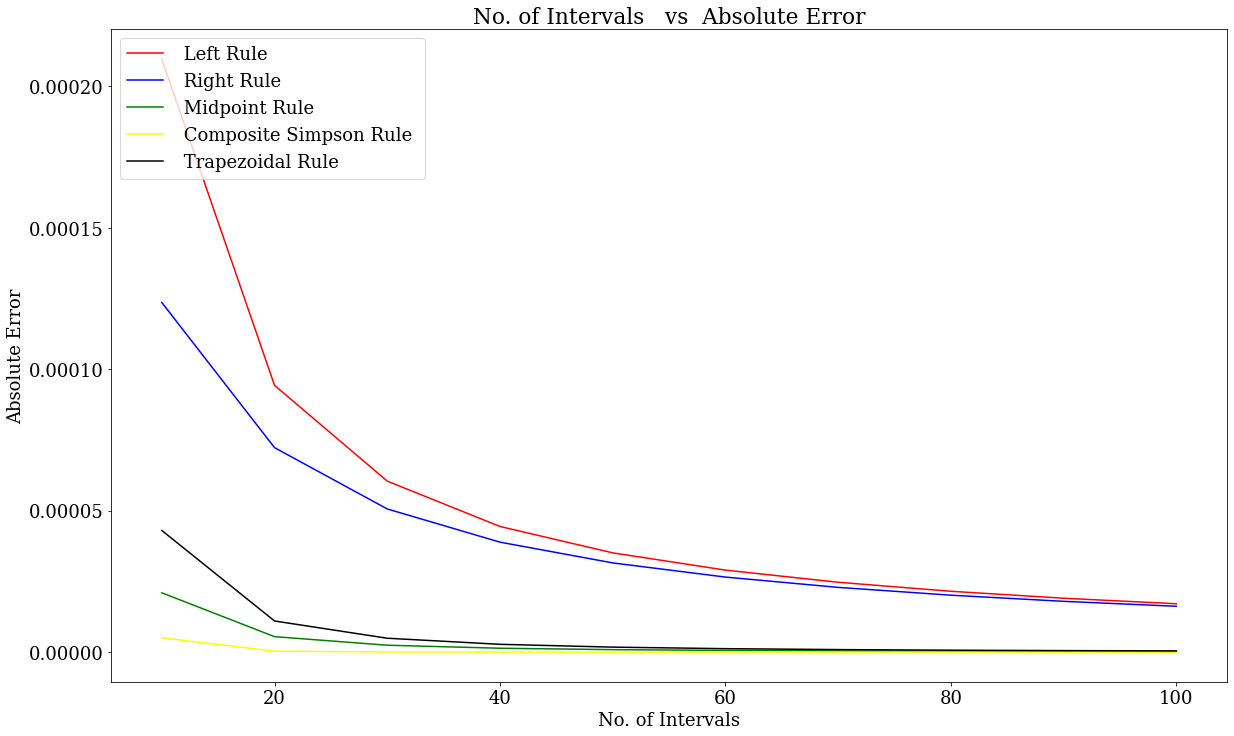

For n = 20000 the value of absolute error for left rule is:                1.6664766289142818e-07
For n = 20000 the value of absolute error for right rule is:               1.6655880807903145e-07
For n = 20000 the value of absolute error for mid rule is:                 2.2213841877061213e-11
For n = 20000 the value of absolute error for composite simpson rule is:   1.1102230246251565e-16
For n = 20000 the value of absolute error for trapezoidal rule is:         4.44274617095175e-11


In [12]:
plt.figure(figsize=(20,12))

plt.plot(n_vs_error[:10,0], n_vs_error[:10,1], 'r',label=r" Left Rule ")

plt.plot(n_vs_error[:10,0], n_vs_error[:10,2], 'b',label=r" Right Rule ")

plt.plot(n_vs_error[:10,0], n_vs_error[:10,3], 'g',label=r" Midpoint Rule ")

plt.plot(n_vs_error[:10,0], n_vs_error[:10,4], '#fbff00',label=r" Composite Simpson Rule ")

plt.plot(n_vs_error[:10,0], n_vs_error[:10,5], '#000000',label=r" Trapezoidal Rule ")

plt.legend(loc = 2)

plt.xlabel('No. of Intervals')

plt.ylabel('Absolute Error')

plt.title("No. of Intervals   vs  Absolute Error")

plt.show()

print(f'For n = 20000 the value of absolute error for left rule is:                {n_vs_error[999,1]}')
print(f'For n = 20000 the value of absolute error for right rule is:               {n_vs_error[999,2]}')
print(f'For n = 20000 the value of absolute error for mid rule is:                 {n_vs_error[999,3]}')
print(f'For n = 20000 the value of absolute error for composite simpson rule is:   {n_vs_error[999,4]}')
print(f'For n = 20000 the value of absolute error for trapezoidal rule is:         {n_vs_error[999,5]}')



### Comment
#### From the plot we see that 'composite simpson rule' has the steepest descent and it is giving the smallest absolute error.

#### Please note that the formula for simpson rule as written in the lecture notes is WRONG. It's correct form contains a factor of '4' multiplied by the fourth term in the formula.

#### It is clear that, simpson, midpoint and trapezoidal rules are giving smallest values of error.

#### And the general trend that error, decreases, as the number of intervals increase, is clear!



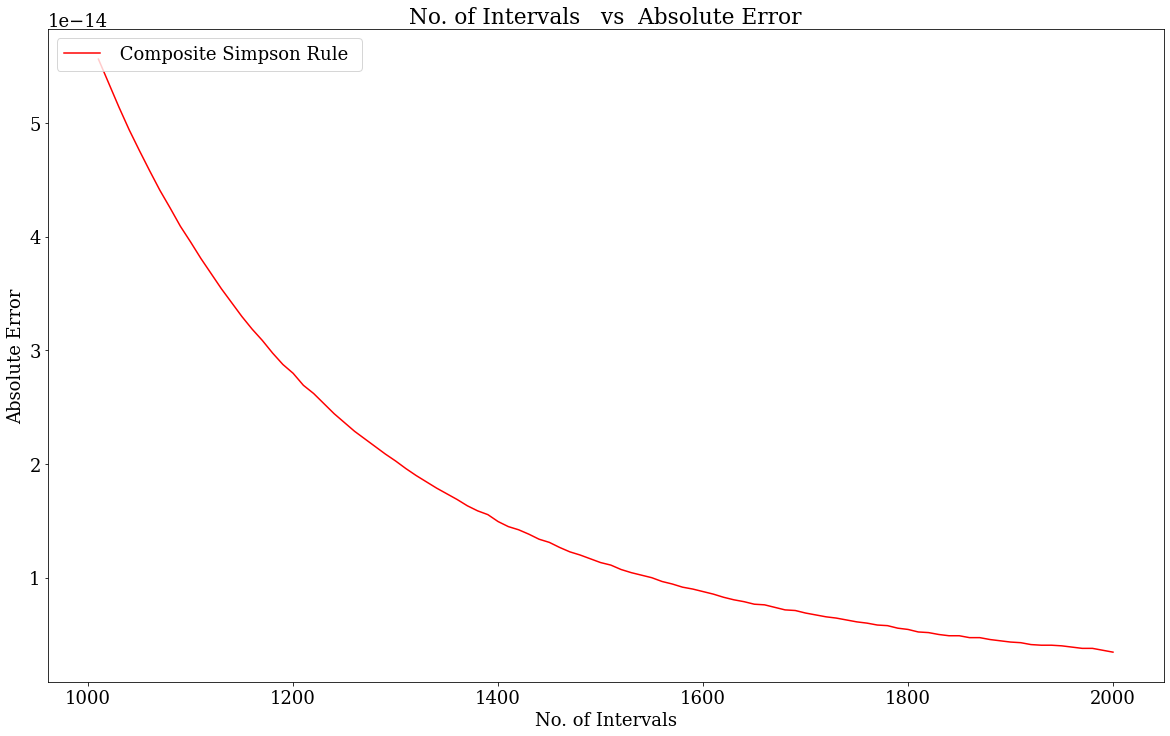

In [13]:
plt.figure(figsize=(20,12))

plt.plot(n_vs_error[100:200,0], n_vs_error[100:200,4], 'r',label=r" Composite Simpson Rule ")

plt.legend(loc = 2)

plt.xlabel('No. of Intervals')

plt.ylabel('Absolute Error')

plt.title("No. of Intervals   vs  Absolute Error")

plt.show()


In [14]:
# please note that running this line is extremely important, because there were a lot of '0' entries in the column containing the
# the absolute errors for Composite Simpson rule. In these entries the absolute error was zero.
# since in order to apply linear regression on a power law, we first have to take natural log. And natural log of 0 is -ive infinity
# ln(0) = -inf, so, in order to avoid all those infinities during linear regression, we replace all the 0s in our column, with
# machine precision number 1e-16 (which in this case is very nicely fitting with it's surrounding data)

n_vs_error[:,4][n_vs_error[:,4] == 0 ] = 1e-16
n_vs_error[:,4]



array([5.07462935e-06, 3.51352285e-07, 7.06188730e-08, 2.24774970e-08,
       9.23193388e-09, 4.45870274e-09, 2.40883363e-09, 1.41282641e-09,
       8.82368068e-10, 5.79084669e-10, 3.95604993e-10, 2.79367751e-10,
       2.02852846e-10, 1.50828960e-10, 1.14463217e-10, 8.84258222e-11,
       6.93883839e-11, 5.52092261e-11, 4.44736470e-11, 3.62253005e-11,
       2.98034930e-11, 2.47437626e-11, 2.07134310e-11, 1.74714132e-11,
       1.48394630e-11, 1.26849642e-11, 1.09077192e-11, 9.43101153e-12,
       8.19611046e-12, 7.15677517e-12, 6.27708996e-12, 5.52852208e-12,
       4.88820096e-12, 4.33797442e-12, 3.86313204e-12, 3.45157236e-12,
       3.09330339e-12, 2.78022050e-12, 2.50582888e-12, 2.26452190e-12,
       2.05158113e-12, 1.86300975e-12, 1.69564363e-12, 1.54676272e-12,
       1.41375800e-12, 1.29474209e-12, 1.18799415e-12, 1.09207088e-12,
       1.00564002e-12, 9.27535826e-13, 8.56925642e-13, 7.92921284e-13,
       7.34634575e-13, 6.81732448e-13, 6.33493258e-13, 5.89417404e-13,
      

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

The beta in case of left rule is:               -1.0052924405457104
The beta in case of right rule is:              -0.994077197546949
The beta in case of mid rule is:                -1.999481333301261
The beta in case of composite simpson rule is:  -3.3223344160656914
The beta in case of trapezoidal rule is:        -1.9997065568297814


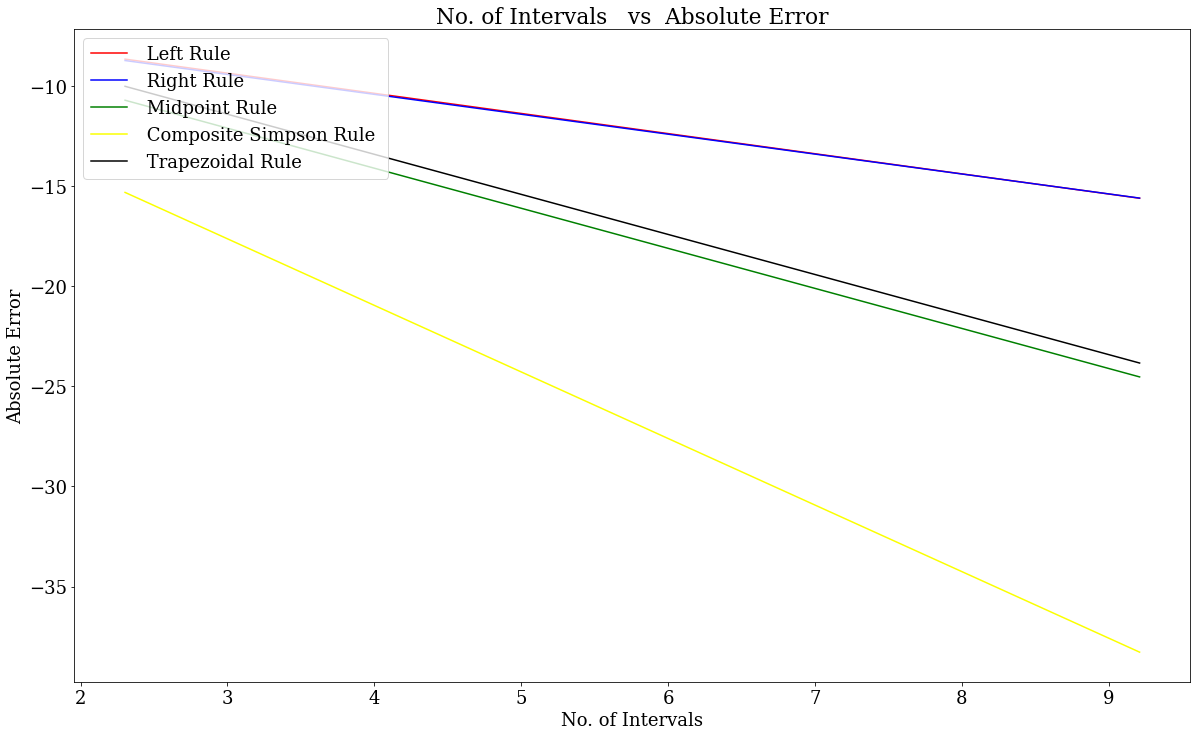

In [15]:
def lin_reg(x_data, y_data):
    """If you give this this function x_data and the corresponding y_data,
    it'll return you a0 and a1 for linear regression"""
    
    x_data_avg  = np.mean(x_data)
    y_data_avg  = np.mean(y_data)
    
    N = np.squeeze(x_data.shape)
    
    
    s1 = np.sum(x_data*y_data) - N*x_data_avg*y_data_avg
    
    s2 = np.sum(x_data**2) - N*x_data_avg*x_data_avg

    a1 = s1/s2

    a0 = y_data_avg - a1*x_data_avg

    return (a0, a1)


x_lin_reg = np.log( n_vs_error[:,0] )



y_left_rule_lin_reg = np.log( n_vs_error[:,1] )

y_right_rule_lin_reg = np.log( n_vs_error[:,2] )

y_mid_rule_lin_reg = np.log( n_vs_error[:,3] )

y_simpson_rule_lin_reg = np.log( n_vs_error[:,4] )                                               

y_trapezoidal_rule_lin_reg = np.log( n_vs_error[:,5] )



a0l, a1l = lin_reg(x_lin_reg, y_left_rule_lin_reg)
a0r, a1r = lin_reg(x_lin_reg, y_right_rule_lin_reg)
a0m, a1m = lin_reg(x_lin_reg, y_mid_rule_lin_reg)
a0s, a1s = lin_reg(x_lin_reg, y_simpson_rule_lin_reg)                                   
a0t, a1t = lin_reg(x_lin_reg, y_trapezoidal_rule_lin_reg)

print(f'The beta in case of left rule is:               {a1l}')
print(f'The beta in case of right rule is:              {a1r}')
print(f'The beta in case of mid rule is:                {a1m}')
print(f'The beta in case of composite simpson rule is:  {a1s}')
print(f'The beta in case of trapezoidal rule is:        {a1t}')


plt.figure(figsize=(20,12))

plt.plot(x_lin_reg, a1l*x_lin_reg + a0l, 'r',label=r" Left Rule ")

plt.plot(x_lin_reg, a1r*x_lin_reg + a0r, 'b',label=r" Right Rule ")

plt.plot(x_lin_reg, a1m*x_lin_reg + a0m, 'g',label=r" Midpoint Rule ")

plt.plot(x_lin_reg, a1s*x_lin_reg + a0s, '#fbff00',label=r" Composite Simpson Rule ")

plt.plot(x_lin_reg, a1t*x_lin_reg + a0t, '#000000',label=r" Trapezoidal Rule ")

plt.legend(loc = 2)

plt.xlabel('No. of Intervals')

plt.ylabel('Absolute Error')

plt.title("No. of Intervals   vs  Absolute Error")

plt.show()



## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


In [16]:
# we first break the improper integral into two parts, one from -inf to -1 AND from -1 to 1
# we then use substitution method on the first, and set x = 1/t,
# as x goes to -inf, t goes to zero
# as x goes to -1, t goes to -1

def f1(x):
    y = (1/np.sqrt(2*np.pi)) * (np.exp((-x**2)/2))
    return y

def f2(x):
    y = (1/np.sqrt(2*np.pi)) * (np.exp((-1)/((2)*(x**2)))) * (1/x**2)
    return y

domain1 = np.linspace(-1 , 1, 21)
domain2 = np.linspace(-1 , -1e-16, 11)   # the domain should have been  [-1,0] but we have excluded 0 from the domain to avoid
                                         # errors, as f2 is undefined at 0

Integral = composite_simpson_rule( step_size_f( domain1 ) , f1( domain1 ) ) + composite_simpson_rule( step_size_f( domain2 ) , f2( domain2 ) )

print(f'The value of Numerically evaluated value of integral is: {Integral}')



The value of Numerically evaluated value of integral is: 0.8411406351368055


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x) and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [17]:
def montecarlo(g,a,b):
    """This function takes in as input one array g.
    The array 'g' contains the values of g(x) (the function to be integrated) at uniformly distributed random points
    b/w a and b. It then sums all entries of the array g & it then divides the sum by total number of points."""
    
    I = np.multiply(np.sum(g)/len(g) , b - a) 
    
    return I



Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [18]:
# passing ' np.linspace(-2,2,41) ' to f(  ), applies f(  ) to all the entries
# of the array 'np.random.uniform(-2,2,41)' which contains uniformly distributed
# random arrays b/w [-2,2]


domain_random = np.random.uniform(-2,2,41)
domain        = np.linspace(-2,2,41)

print(f'The analytically calculated value x^2 in the domain_random [-2,2] is: {5.333333333333333}\n')


print(f'The absolute error is { abs_error( montecarlo( test_function( domain_random ) ,-2, 2) , 5.333333333333333 ) }\n')
# passing ' np.linspace(-2,2,41) ' to f(  ), applies f(  ) to all the entries
# of the array 'np.random.uniform(-2,2,41)' which contains uniformly distributed
# random arrays b/w [-2,2]


print(f"The absolute error if composite simpson rule is used: {abs_error( composite_simpson_rule(step_size_f( domain ), test_function( domain )) , 5.333333333333333 )}\n")



The analytically calculated value x^2 in the domain_random [-2,2] is: 5.333333333333333

The absolute error is 1.0094718888679575

The absolute error if composite simpson rule is used: 7.105427357601002e-15



Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 

In [19]:
n_vs_error_monte = np.zeros((1000,2))  # we will calculate the absolute error for the values of intervals that are multiples
                                        # of 10 i.e     20, 40 ,60, ..... , 10000
                                        # we'll get 400 data points in total

a_ar = np.zeros((100,1))

for i in range(1001):                  
    
    if i == 0:
        continue
    
    points = i*10 + 1
    
    for j in range(100):
        n = np.random.uniform(-2,2,points)  # no. of points
        
        a_ar[j] =  abs_error( montecarlo( test_function( n ) ,-2, 2) , 5.333333333333333 )
    
    n_vs_error_monte[i-1][0] = points - 1  # first column of this matrix wil contain no. of the intervals
    
    n_vs_error_monte[i-1][1] = np.mean(a_ar)
    
    

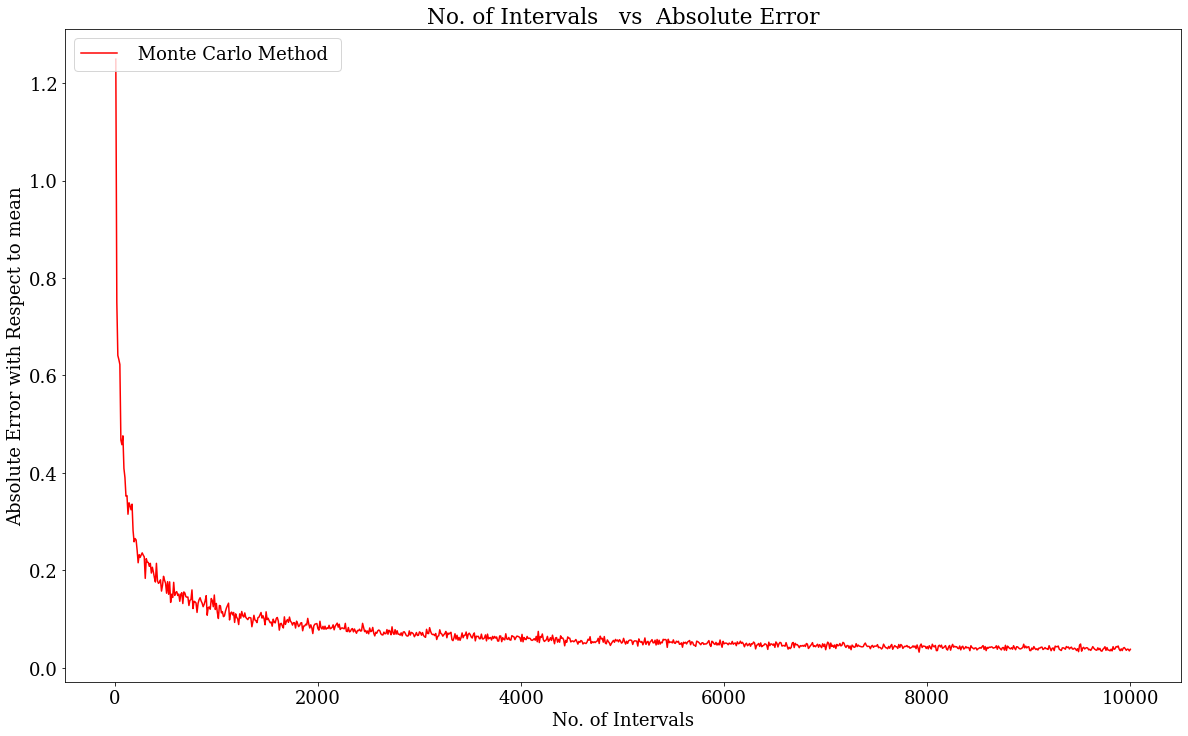

In [20]:
# printing the data

plt.figure(figsize=(20,12))

plt.plot(n_vs_error_monte[:,0], n_vs_error_monte[:,1], 'r',label=r" Monte Carlo Method ")

plt.legend(loc = 2)

plt.xlabel('No. of Intervals')

plt.ylabel('Absolute Error with Respect to mean')

plt.title("No. of Intervals   vs  Absolute Error")

plt.show()



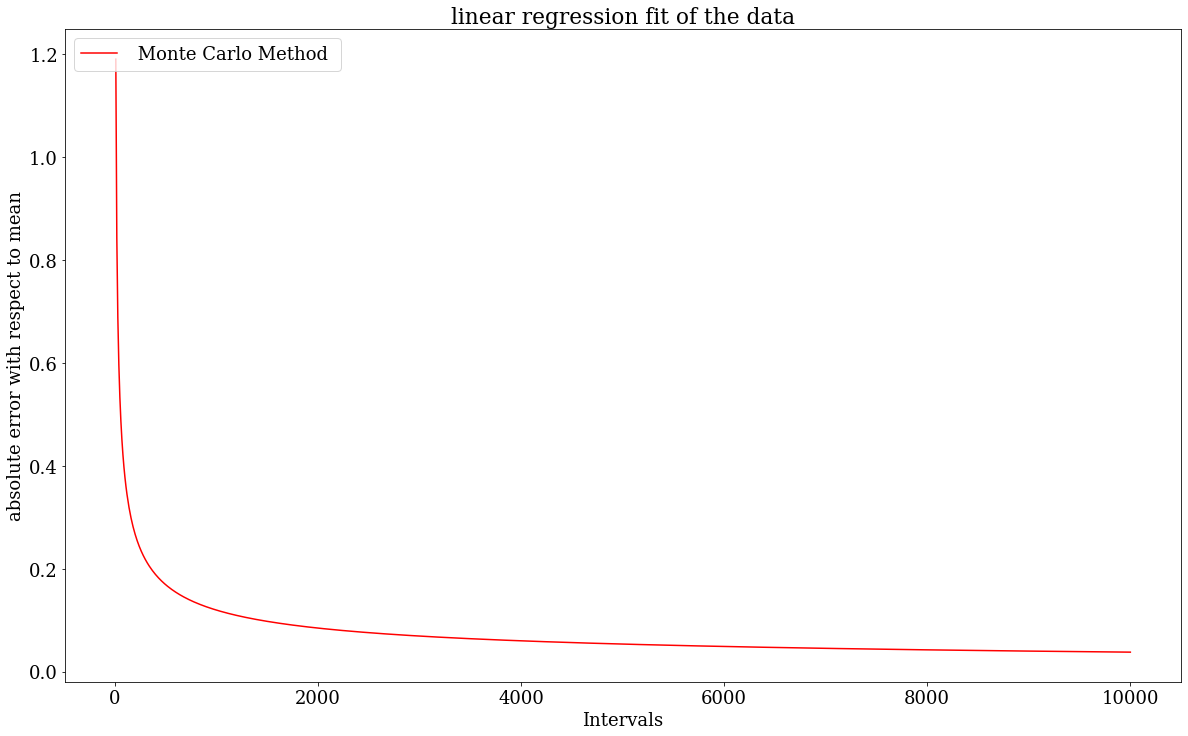

The value of beta is : -0.4986461425649528


In [22]:
x_lin_reg_monte = np.log( n_vs_error_monte[:,0] )

y_monte_lin_reg = np.log( n_vs_error_monte[:,1] )


a0mt, a1mt = lin_reg(x_lin_reg_monte, y_monte_lin_reg)



plt.figure(figsize=(20,12))

plt.plot(n_vs_error_monte[:,0], ((n_vs_error_monte[:,0])**a1mt) * np.exp(a0mt), 'r',label=r" Monte Carlo Method ")

plt.legend(loc = 2)

plt.xlabel('Intervals')

plt.ylabel('absolute error with respect to mean')

plt.title("linear regression fit of the data")

plt.show()



print(f'The value of beta is : {a1mt}')



# -0.5 = -1/2, which is indeed the expected result!

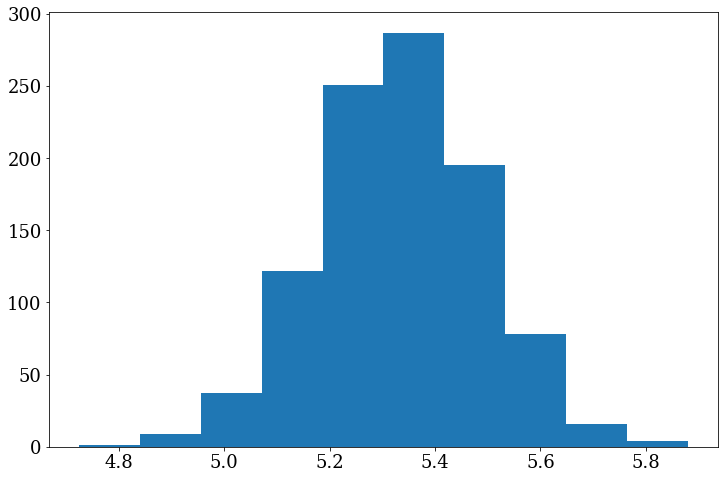

In [29]:
a_ar_2 = np.zeros((1000,1))

for j in range(1000):
    n = np.random.uniform(-2,2,1000)  # no. of points
        
    a_ar_2[j] =  montecarlo( test_function( n ) ,-2, 2)


plt.figure(figsize=(12,8))

n, bins, patches = plt.hist(a_ar_2)

plt.show()

# Source: https://stackoverflow.com/questions/22729019/distribution-plot-of-an-array



# The data is centered somewhere around [5.3,5.4], we know that the analytically calculated value of integral is 5.3333.
# So, it means that the probability of getting a value that is close to analytical value is very high.
# The probability of getting a value far from analytical value is low!
# The mean will always be very very close to analytical value, because most of the numerical values are close to the analytical value  